In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 

In [77]:
train_dataset = pd.read_csv('~/MLpractice/hahaton/Regression-Used-Cars/data/train.csv')
test_dataset = pd.read_csv('~/MLpractice/hahaton/Regression-Used-Cars/data/test.csv')

In [78]:
train_dataset.head(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [83]:
train_dataset['accident_bool'] = train_dataset.accident.map(lambda x: 1 if x == 'At least 1 accident or damage reported' else 0)
train_dataset = train_dataset.drop(columns=['accident'])

In [85]:
train_dataset.clean_title = train_dataset.clean_title.fillna(0)

In [86]:
train_dataset.clean_title = train_dataset.clean_title.map(lambda x: 1 if x == 'Yes' else 0)

In [87]:
train_dataset

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,clean_title,price,accident_bool
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,1,4200,0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,1,4999,1
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,1,13900,0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,1,45000,0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,1,97500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,1,27500,0
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,1,30000,1
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,1,86900,0
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,0,84900,0


In [92]:
train_dataset.fuel_type = train_dataset.fuel_type.map(lambda x: np.nan if x in ('–', 'not supported') else x)

In [94]:
train_dataset.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5879
engine              0
transmission        0
ext_col             0
int_col             0
clean_title         0
price               0
accident_bool       0
dtype: int64

In [54]:
train_dataset.corr(numeric_only=True)['price']

id              -0.000877
model_year       0.231795
milage          -0.283067
price            1.000000
accident_bool   -0.125122
Name: price, dtype: float64

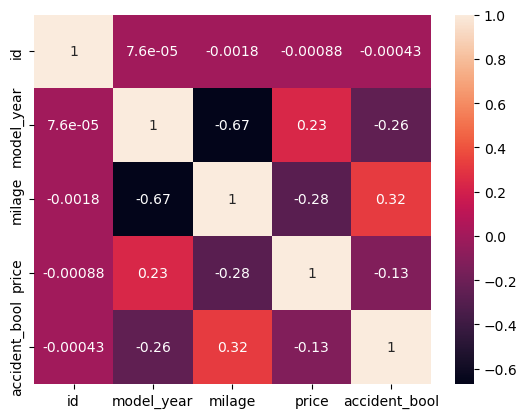

In [55]:
mp = sns.heatmap(train_dataset.corr(numeric_only=True), annot=True)